In [ ]:
#@title Install

#@markdown Installs the camera-match library needed to run this notebook.

!pip install camera-match[RBF]

In [ ]:
#@title Upload Source Data

#@markdown Run this cell to upload your **source** data.

#@markdown Your data should be in a CSV file with R,G,B values and no header row.

import numpy as np
from io import BytesIO
from google.colab import files
source_uploaded = files.upload()

source_key = next(iter(source_uploaded))
source_text = BytesIO(source_uploaded[source_key])
source_data = np.loadtxt(source_text, delimiter=',')
print("Uploaded Source Data")

In [ ]:
#@title Upload Target Data

#@markdown Run this cell to upload your **target** data.

#@markdown Your data should be in a CSV file with R,G,B values and no header row.

import numpy as np
from io import BytesIO
from google.colab import files
target_uploaded = files.upload()

target_key = next(iter(target_uploaded))
target_text = BytesIO(target_uploaded[target_key])
target_data = np.loadtxt(target_text, delimiter=',')
print("Uploaded Target Data")

In [61]:
#@title Test Data
#@markdown If you don't have your own data you can run this cell to create some profiled data.

import numpy as np

bmpcc_ev5 = np.array([
    [0.0460915677249, 0.0414372496307, 0.0392063446343],
    [0.0711114183068, 0.0562727414072, 0.0510282665491],
    [0.0467581525445, 0.0492189191282, 0.0505541190505],
    [0.0438489019871, 0.0439518913627, 0.0398572906852],
    [0.0528589934111, 0.0513301566243, 0.053715031594],
    [0.0532470569015, 0.0642049908638, 0.0598093234003],
    [0.0741018876433, 0.05092523247, 0.0408178716898],
    [0.0423498302698, 0.0450261421502, 0.0503918193281],
    [0.0675406232476, 0.0449453294277, 0.0426707789302],
    [0.0431047976017, 0.0396815128624, 0.0407661236823],
    [0.0623558349907, 0.0627693012357, 0.0449793711305],
    [0.0780004486442, 0.0589359775186, 0.0423480682075],
    [0.0383102893829, 0.0408913008869, 0.0463486164808],
    [0.0449398159981, 0.051223449409, 0.0436665527523],
    [0.0605712197721, 0.0408491492271, 0.039560649544],
    [0.0839879736304, 0.0695889443159, 0.0456777960062],
    [0.0661272406578, 0.0471204407513, 0.0486314110458],
    [0.0421241633594, 0.0513718873262, 0.0551407411695],
    [0.0935765132308, 0.0885080546141, 0.0793258547783],
    [0.076102823019, 0.0730573609471, 0.0665111765265],
    [0.0612461790442, 0.0595223456621, 0.0549791306257],
    [0.0493664592505, 0.0483960658312, 0.0459917224944],
    [0.0416325256228, 0.0411071740091, 0.0399382300675],
    [0.0376956760883, 0.0373171977699, 0.0366522930562],
])



bmpcc_ev3 = np.array([
    [0.0740560814738, 0.05923063308, 0.0521040149033],
    [0.136400043964, 0.103186793625, 0.0920622348785],
    [0.0752209872007, 0.0845524668694, 0.0914291664958],
    [0.0665660500526, 0.0675040408969, 0.0541567131877],
    [0.0928729474545, 0.0900838896632, 0.0999011397362],
    [0.0933902338147, 0.121971435845, 0.11466152221],
    [0.142398238182, 0.0883536785841, 0.0558374896646],
    [0.061091594398, 0.0722640752792, 0.0922593176365],
    [0.127904608846, 0.0711123794317, 0.065324768424],
    [0.0639800950885, 0.0533160306513, 0.0591095089912],
    [0.116367824376, 0.118290036917, 0.0731778591871],
    [0.150775656104, 0.108295731246, 0.0613302737474],
    [0.0481528453529, 0.0579589866102, 0.0775759518147],
    [0.070054627955, 0.0888478159904, 0.0667306706309],
    [0.111575253308, 0.0571862980723, 0.0524330176413],
    [0.162998959422, 0.132769539952, 0.0714641213417],
    [0.124962449074, 0.0779813304543, 0.0847150087357],
    [0.0605436041951, 0.0910841077566, 0.104176178575],
    [0.178407475352, 0.171446308494, 0.158539667726],
    [0.144818425179, 0.140421316028, 0.130276352167],
    [0.113085463643, 0.110343307257, 0.101886592805],
    [0.0833635553718, 0.0813099518418, 0.0755831226707],
    [0.059470910579, 0.0586282461882, 0.0558424815536],
    [0.0458114370704, 0.0449790172279, 0.0435505397618],
])


bmpcc_ev2 = np.array([
    [0.100553825498, 0.0777631029487, 0.065978936851],
    [0.18773342669, 0.142437130213, 0.126612842083],
    [0.102123863995, 0.11582672596, 0.125975102186],
    [0.0896840766072, 0.090802565217, 0.0691438242793],
    [0.127843722701, 0.123879477382, 0.138538405299],
    [0.128630071878, 0.168359100819, 0.158364400268],
    [0.19481523335, 0.121282994747, 0.0725131779909],
    [0.0806844085455, 0.098013907671, 0.127507597208],
    [0.175716131926, 0.0960216373205, 0.0870327427983],
    [0.0853061079979, 0.0680686756968, 0.0777593553066],
    [0.160317614675, 0.163454964757, 0.100021958351],
    [0.205777838826, 0.149319067597, 0.0811409726739],
    [0.0588999912143, 0.0759947746992, 0.10651256144],
    [0.0943496450782, 0.121910460293, 0.0898800566792],
    [0.154359295964, 0.0745659843087, 0.0665683299303],
    [0.221456736326, 0.182601675391, 0.0974633619189],
    [0.172096341848, 0.106064803898, 0.116670168936],
    [0.0795395448804, 0.12507557869, 0.144167274237],
    [0.240692064166, 0.232031017542, 0.214808657765],
    [0.197923138738, 0.192203119397, 0.179044008255],
    [0.155955553055, 0.152202442288, 0.14092490077],
    [0.114157572389, 0.111066475511, 0.102502547204],
    [0.078239955008, 0.0767681375146, 0.0717429369688],
    [0.0549056231976, 0.0536197721958, 0.0511143282056],
])


bmpcc_ev1 = np.array([
    [0.131368070841, 0.10049713403, 0.0837736055255],
    [0.241442888975, 0.185875877738, 0.166056275368],
    [0.13351726532, 0.151965349913, 0.165526866913],
    [0.116727128625, 0.118553243577, 0.0889023244381],
    [0.167673319578, 0.162517607212, 0.18187469244],
    [0.168623611331, 0.218581393361, 0.206365898252],
    [0.25035071373, 0.159308612347, 0.0949264466763],
    [0.104465454817, 0.12830747664, 0.167773544788],
    [0.227412492037, 0.126210406423, 0.114796310663],
    [0.11123599112, 0.0873690098524, 0.101503744721],
    [0.208630338311, 0.212732687593, 0.132562220097],
    [0.263809561729, 0.195189833641, 0.106071211398],
    [0.0734945014119, 0.0985675379634, 0.140475958586],
    [0.123801060021, 0.16016715765, 0.117496363819],
    [0.200806885958, 0.0964861735702, 0.0856526717544],
    [0.282391756773, 0.23659864068, 0.128447026014],
    [0.223174363375, 0.139535054564, 0.154255926609],
    [0.103277407587, 0.164172485471, 0.188976347446],
    [0.305530041456, 0.295359611511, 0.277049094439],
    [0.255798459053, 0.248691320419, 0.231718242168],
    [0.203926369548, 0.199175655842, 0.185200542212],
    [0.15026448667, 0.146108031273, 0.134764179587],
    [0.101853504777, 0.099691323936, 0.0933271348476],
    [0.0676267743111, 0.0655043125153, 0.0614701732993],
])


bmpcc_ev0 = np.array([
    [0.187194570899, 0.143391832709, 0.118998959661],
    [0.325283706188, 0.258846461773, 0.234672471881],
    [0.189440637827, 0.214481309056, 0.233378082514],
    [0.166420117021, 0.16918425262, 0.127173364162],
    [0.234857469797, 0.228242352605, 0.253277361393],
    [0.236766278744, 0.298442065716, 0.284813255072],
    [0.336303859949, 0.225739330053, 0.137530907989],
    [0.149269595742, 0.182997956872, 0.235567808151],
    [0.309396505356, 0.180753663182, 0.165860667825],
    [0.158660262823, 0.12409503758, 0.145910978317],
    [0.286784052849, 0.291298121214, 0.191125333309],
    [0.351373583078, 0.270707011223, 0.155317246914],
    [0.102651029825, 0.140505880117, 0.199603110552],
    [0.176593184471, 0.225482329726, 0.169183388352],
    [0.277017116547, 0.138050585985, 0.123287171125],
    [0.371852636337, 0.320284128189, 0.193965852261],
    [0.303737103939, 0.198780238628, 0.218919530511],
    [0.14735558629, 0.230662554502, 0.262692570686],
    [0.397530376911, 0.386551648378, 0.369702935219],
    [0.341573446989, 0.333733677864, 0.317543298006],
    [0.280697137117, 0.274528503418, 0.257382184267],
    [0.211927354336, 0.206856831908, 0.192842721939],
    [0.144937545061, 0.142036244273, 0.132647529244],
    [0.0938510447741, 0.0906024798751, 0.0847830474377],
])


bmpcc_ev_1 = np.array([
    [0.254976183176, 0.199122950435, 0.167863801122],
    [0.412971407175, 0.340676993132, 0.316979080439],
    [0.257956504822, 0.288706570864, 0.312292277813],
    [0.228576242924, 0.232948213816, 0.179281249642],
    [0.312413781881, 0.305347025394, 0.336317181587],
    [0.315552979708, 0.384361296892, 0.372185558081],
    [0.424604922533, 0.30354103446, 0.204432606697],
    [0.206273287535, 0.25004157424, 0.313935250044],
    [0.396237522364, 0.24908849597, 0.232829391956],
    [0.218396157026, 0.1734572649, 0.203889071941],
    [0.371495842934, 0.377103865147, 0.267901778221],
    [0.441252171993, 0.354970604181, 0.227670133114],
    [0.143309533596, 0.195323213935, 0.270330965519],
    [0.242323860526, 0.301443040371, 0.235428705812],
    [0.360619723797, 0.194482073188, 0.17666053772],
    [0.462853521109, 0.408830791712, 0.273845970631],
    [0.3900128901, 0.271221220493, 0.297636985779],
    [0.205060362816, 0.308203071356, 0.34601393342],
    [0.488693773746, 0.478186488152, 0.466154485941],
    [0.430427461863, 0.42269012332, 0.408826649189],
    [0.364452809095, 0.358364999294, 0.342617452145],
    [0.285444498062, 0.279421418905, 0.263307273388],
    [0.200954183936, 0.197458520532, 0.186235383153],
    [0.129917547107, 0.12573634088, 0.118714340031],
])


bmpcc_ev_2 = np.array([
    [0.328486680984, 0.265139877796, 0.229301705956],
    [0.496958345175, 0.424453765154, 0.405461579561],
    [0.332584887743, 0.367481887341, 0.395409911871],
    [0.299136728048, 0.304352104664, 0.244628846645],
    [0.392792791128, 0.385673105717, 0.420984774828],
    [0.397078812122, 0.469323039055, 0.460434734821],
    [0.509557068348, 0.385459512472, 0.287112146616],
    [0.272792488337, 0.324203968048, 0.39632114768],
    [0.480273604393, 0.326046556234, 0.313047885895],
    [0.28660351038, 0.232961520553, 0.270689338446],
    [0.455062270164, 0.460440039635, 0.35636511445],
    [0.524356305599, 0.439323484898, 0.319415122271],
    [0.193891406059, 0.259798169136, 0.348069012165],
    [0.315594017506, 0.381230592728, 0.312120705843],
    [0.44399818778, 0.261968821287, 0.246226325631],
    [0.546833097935, 0.493699133396, 0.376515924931],
    [0.474293589592, 0.35011780262, 0.381380885839],
    [0.27273645997, 0.389179050922, 0.431220620871],
    [0.541164338589, 0.540571153164, 0.540675163269],
    [0.515609681606, 0.507822275162, 0.50147163868],
    [0.447682589293, 0.441751509905, 0.430178165436],
    [0.363101840019, 0.357033401728, 0.342882484198],
    [0.266261607409, 0.262320965528, 0.249796420336],
    [0.175780668855, 0.170579746366, 0.162431403995],
])


bmpcc_ev_3 = np.array([
    [0.41567966342, 0.348266988993, 0.315705120564],
    [0.542687833309, 0.52697956562, 0.526081323624],
    [0.421401649714, 0.457819998264, 0.490855753422],
    [0.385068446398, 0.391252756119, 0.332147628069],
    [0.483602494001, 0.478029489517, 0.518412768841],
    [0.492760628462, 0.549995064735, 0.55271679163],
    [0.54899674654, 0.49423161149, 0.435382515192],
    [0.355414628983, 0.411910951138, 0.488967090845],
    [0.549026608467, 0.426391363144, 0.425586909056],
    [0.369893878698, 0.311317592859, 0.357198864222],
    [0.543444097042, 0.536644458771, 0.494722127914],
    [0.545031964779, 0.53688454628, 0.498365908861],
    [0.263624429703, 0.340724527836, 0.43776807189],
    [0.403958767653, 0.471132338047, 0.408044248819],
    [0.533861935139, 0.349929988384, 0.341054052114],
    [0.544707536697, 0.544048666954, 0.543005526066],
    [0.549930334091, 0.447823137045, 0.486317694187],
    [0.357852578163, 0.479744106531, 0.526131629944],
    [0.544100284576, 0.543933331966, 0.544328629971],
    [0.543835103512, 0.543569505215, 0.543720424175],
    [0.537681758404, 0.530808627605, 0.533211886883],
    [0.452061444521, 0.446701198816, 0.438134640455],
    [0.347374737263, 0.343915104866, 0.334623575211],
    [0.239620387554, 0.233612895012, 0.22511343658],
])


bmpcc_ev_4 = np.array([
    [0.495934993029, 0.431989550591, 0.411689847708],
    [0.546033322811, 0.545464873314, 0.545931041241],
    [0.507660269737, 0.53735011816, 0.559688448906],
    [0.469157248735, 0.475080698729, 0.430278152227],
    [0.546307325363, 0.545388698578, 0.54703772068],
    [0.547086298466, 0.547515690327, 0.547863781452],
    [0.546120285988, 0.545190751553, 0.545288264751],
    [0.439189761877, 0.496193915606, 0.575760304928],
    [0.546293437481, 0.536479830742, 0.550194382668],
    [0.452395886183, 0.396018594503, 0.446679532528],
    [0.547025263309, 0.547071397305, 0.547167897224],
    [0.548102676868, 0.547691404819, 0.547682821751],
    [0.340525567532, 0.420041382313, 0.520252943039],
    [0.489936113358, 0.544455289841, 0.515069901943],
    [0.552031517029, 0.466235220432, 0.477464199066],
    [0.547539532185, 0.547320485115, 0.547499716282],
    [0.547337472439, 0.540941953659, 0.546974897385],
    [0.451290220022, 0.552390694618, 0.566800832748],
    [0.546756386757, 0.54670882225, 0.547438204288],
    [0.546606123447, 0.54646718502, 0.546948969364],
    [0.546065330505, 0.54584723711, 0.546123981476],
    [0.533290803432, 0.528338551521, 0.533066272736],
    [0.428929120302, 0.42634421587, 0.424521058798],
    [0.315428614616, 0.309824734926, 0.307066351175],
])


film_ev5 = np.array([
    [0.0537128634751, 0.0549002364278, 0.0521950721741],
    [0.0779063776135, 0.0621158666909, 0.0541097335517],
    [0.051306720823, 0.0570512823761, 0.0635398775339],
    [0.0526940524578, 0.0568654276431, 0.052476786077],
    [0.0593223832548, 0.0599646940827, 0.0662581026554],
    [0.0550011359155, 0.0707163587213, 0.0695820376277],
    [0.0873089954257, 0.0666317939758, 0.0583428293467],
    [0.0564974583685, 0.0601792782545, 0.0719803124666],
    [0.0853395685554, 0.0632714182138, 0.0581243187189],
    [0.0601504482329, 0.0612671151757, 0.0610024593771],
    [0.0673344656825, 0.07788284868, 0.0601745508611],
    [0.0951292961836, 0.0766179859638, 0.0567842014134],
    [0.0644910931587, 0.0664251893759, 0.07673817873],
    [0.0654818192124, 0.0716737434268, 0.0674228593707],
    [0.0880331397057, 0.0687363147736, 0.0628530904651],
    [0.104990050197, 0.0920896232128, 0.0588461570442],
    [0.0953312367201, 0.0719042420387, 0.0716199502349],
    [0.0685915723443, 0.0726228877902, 0.081942409277],
    [0.122274011374, 0.115965977311, 0.101764276624],
    [0.0999183654785, 0.0961297601461, 0.0918947905302],
    [0.0846295505762, 0.083110012114, 0.0818629786372],
    [0.0781699046493, 0.0772493258119, 0.0758083984256],
    [0.0775008797646, 0.0762764513493, 0.0745459794998],
    [0.0783451348543, 0.0764335244894, 0.0731476023793],
])




film_ev4 = np.array([
    [0.0617765784264, 0.0594617016613, 0.0574138574302],
    [0.122458763421, 0.0842470377684, 0.0599480345845],
    [0.0549916774035, 0.0651253089309, 0.0825565308332],
    [0.0555547252297, 0.0619150884449, 0.0551638752222],
    [0.0756087601185, 0.0697164386511, 0.0873428359628],
    [0.0574823282659, 0.0985110849142, 0.0930940657854],
    [0.133964493871, 0.0836828947067, 0.0501293055713],
    [0.057698071003, 0.0643093660474, 0.0977552980185],
    [0.131474718451, 0.0731374919415, 0.056701362133],
    [0.0663919374347, 0.0628416910768, 0.0673684924841],
    [0.0893238410354, 0.110084526241, 0.0583694912493],
    [0.139472365379, 0.104690626264, 0.0469265989959],
    [0.0658587962389, 0.0694670751691, 0.0911298468709],
    [0.0680429115891, 0.0838689506054, 0.0685067921877],
    [0.130526572466, 0.0763785243034, 0.0596858859062],
    [0.149372532964, 0.134319201112, 0.0516403578222],
    [0.139253050089, 0.081843033433, 0.078106328845],
    [0.066501326859, 0.0807066112757, 0.104825206101],
    [0.160393059254, 0.162857443094, 0.13700646162],
    [0.136956200004, 0.134616345167, 0.116393886507],
    [0.110196754336, 0.10645288974, 0.0983887389302],
    [0.0878849923611, 0.086132787168, 0.0858802944422],
    [0.0819257721305, 0.0810276567936, 0.0807423815131],
    [0.0801024362445, 0.0789128765464, 0.0786179080606],
])


film_ev3 = np.array([
    [0.0824437513947, 0.0645606592298, 0.0545139946043],
    [0.162545263767, 0.119655415416, 0.0695620030165],
    [0.0649024918675, 0.0838118568063, 0.115037828684],
    [0.0590058118105, 0.0713743567467, 0.0513700209558],
    [0.107543423772, 0.0923933461308, 0.116468735039],
    [0.0704826042056, 0.140634670854, 0.128649100661],
    [0.176165014505, 0.110109731555, 0.0340617373586],
    [0.0534322485328, 0.0660816282034, 0.132194802165],
    [0.173301056027, 0.0795610547066, 0.0451883561909],
    [0.0750043094158, 0.057828746736, 0.0693400651217],
    [0.118315905333, 0.153939306736, 0.0485409870744],
    [0.172409027815, 0.140997603536, 0.0304669104517],
    [0.0521510392427, 0.0615430250764, 0.116380438209],
    [0.0601705983281, 0.106835544109, 0.0645231902599],
    [0.170566156507, 0.0756310522556, 0.0384587794542],
    [0.179520368576, 0.173773244023, 0.0338514372706],
    [0.171687722206, 0.0844478085637, 0.0850164964795],
    [0.0464638844132, 0.0887631550431, 0.134951233864],
    [0.188339367509, 0.201487332582, 0.180716499686],
    [0.159542873502, 0.172454088926, 0.149140268564],
    [0.132139921188, 0.138741835952, 0.115131281316],
    [0.0954607278109, 0.0954656377435, 0.0858927592635],
    [0.0668569132686, 0.0691370666027, 0.0686518996954],
    [0.0584233552217, 0.0614353120327, 0.0596924759448],
])


film_ev2 = np.array([
    [0.142711862922, 0.105386383832, 0.0578472726047],
    [0.219525039196, 0.181941211224, 0.127159163356],
    [0.1139100492, 0.148720279336, 0.184369668365],
    [0.106925755739, 0.131442576647, 0.0630263984203],
    [0.160381808877, 0.155246466398, 0.189535647631],
    [0.123158179224, 0.210054606199, 0.203687816858],
    [0.237563118339, 0.172055512667, 0.0377018973231],
    [0.0916955843568, 0.113506391644, 0.211361706257],
    [0.23594173789, 0.120298415422, 0.0738269686699],
    [0.136077389121, 0.0822361186147, 0.0988984107971],
    [0.178069755435, 0.223679453135, 0.0701723024249],
    [0.23531730473, 0.208647608757, 0.0388277247548],
    [0.0625314638019, 0.0807633846998, 0.19399613142],
    [0.10339076072, 0.178214564919, 0.0907633155584],
    [0.239390045404, 0.0991678312421, 0.0374807007611],
    [0.243892908096, 0.244937285781, 0.0489961914718],
    [0.23111154139, 0.129077807069, 0.144665271044],
    [0.0769876986742, 0.154382377863, 0.217227369547],
    [0.25330504775, 0.271495819092, 0.262587308884],
    [0.216946333647, 0.237487494946, 0.225845560431],
    [0.185832470655, 0.203607499599, 0.184587016702],
    [0.15031708777, 0.161255449057, 0.134513512254],
    [0.109195500612, 0.108060136437, 0.0921494141221],
    [0.0731233581901, 0.0726661831141, 0.0693763568997],
])


film_ev1 = np.array([
    [0.177878081799, 0.147411853075, 0.0781189724803],
    [0.256266206503, 0.226450771093, 0.174966007471],
    [0.147025540471, 0.189745694399, 0.232898786664],
    [0.141241818666, 0.175714790821, 0.0845271199942],
    [0.196184977889, 0.194907262921, 0.235999494791],
    [0.162196010351, 0.251022696495, 0.249621436],
    [0.276926040649, 0.218161076307, 0.0576154440641],
    [0.123535618186, 0.155188918114, 0.26015073061],
    [0.272116959095, 0.160174071789, 0.111527822912],
    [0.170811921358, 0.112118028104, 0.134261354804],
    [0.219253763556, 0.26568198204, 0.0989179164171],
    [0.27527987957, 0.255223870277, 0.0624184012413],
    [0.0890655070543, 0.113740712404, 0.246156647801],
    [0.137839227915, 0.221987053752, 0.117784686387],
    [0.279183298349, 0.128768578172, 0.0515823177993],
    [0.289581358433, 0.290240049362, 0.0821880996227],
    [0.265095204115, 0.168148353696, 0.190444856882],
    [0.109176196158, 0.196587204933, 0.263866990805],
    [0.311115711927, 0.320892840624, 0.315593183041],
    [0.264081209898, 0.283203333616, 0.276444613934],
    [0.221558213234, 0.243645563722, 0.229781314731],
    [0.181893333793, 0.199203774333, 0.177012354136],
    [0.140793114901, 0.148585498333, 0.121689863503],
    [0.0971571654081, 0.0923291668296, 0.0790679678321],
])


film_ev0 = np.array([
    [0.225256875157, 0.200226053596, 0.131683900952],
    [0.321064203978, 0.294102281332, 0.254871934652],
    [0.195977732539, 0.242371067405, 0.290411710739],
    [0.188343286514, 0.22884143889, 0.136351406574],
    [0.24593091011, 0.251549243927, 0.296553939581],
    [0.223415896297, 0.300070106983, 0.309705078602],
    [0.33381035924, 0.284188598394, 0.114375196397],
    [0.169511154294, 0.206185743213, 0.31524130702],
    [0.318338036537, 0.216226831079, 0.175916537642],
    [0.215361252427, 0.161239728332, 0.198114961386],
    [0.28613987565, 0.32107642293, 0.170552924275],
    [0.339724421501, 0.317517369986, 0.12998740375],
    [0.130665257573, 0.166496917605, 0.308850675821],
    [0.188008055091, 0.273638665676, 0.172530531883],
    [0.325098663568, 0.180245265365, 0.094758361578],
    [0.359827399254, 0.3509093225, 0.160644903779],
    [0.311364620924, 0.225521281362, 0.257064253092],
    [0.155404731631, 0.248790815473, 0.320330142975],
    [0.377213001251, 0.377540618181, 0.376842975616],
    [0.33788523078, 0.344783991575, 0.346372634172],
    [0.287434965372, 0.305073231459, 0.303478419781],
    [0.230619758368, 0.253966420889, 0.243128836155],
    [0.182513162494, 0.200291320682, 0.179123029113],
    [0.141778990626, 0.141816347837, 0.109670601785],
])


film_ev_1 = np.array([
    [0.277870386839, 0.259323209524, 0.204186394811],
    [0.38013446331, 0.353414684534, 0.330082327127],
    [0.264870226383, 0.301221162081, 0.35112914443],
    [0.245454549789, 0.283808171749, 0.209081783891],
    [0.318819642067, 0.316074490547, 0.360569894314],
    [0.305433660746, 0.358740061522, 0.374751389027],
    [0.391765713692, 0.347917735577, 0.20810739696],
    [0.224233835936, 0.261695086956, 0.365064233541],
    [0.368430554867, 0.286425769329, 0.257980555296],
    [0.260741859674, 0.214267477393, 0.265258729458],
    [0.363047093153, 0.381332457066, 0.264876753092],
    [0.396992206573, 0.375378936529, 0.222902521491],
    [0.177294448018, 0.217593103647, 0.35805439949],
    [0.258144527674, 0.327216982841, 0.249954238534],
    [0.366416633129, 0.239458650351, 0.161634936929],
    [0.414435595274, 0.404840528965, 0.249911487103],
    [0.363957256079, 0.294141769409, 0.326959997416],
    [0.218469902873, 0.299280583858, 0.372309088707],
    [0.426190257072, 0.425308138132, 0.427330613136],
    [0.398558884859, 0.399652957916, 0.40317350626],
    [0.360696971416, 0.365448981524, 0.369747579098],
    [0.300945103168, 0.31627959013, 0.316482007504],
    [0.230992734432, 0.254736661911, 0.246785789728],
    [0.18274435401, 0.193421304226, 0.166695997119],
])


film_ev_2 = np.array([
    [0.34524834156, 0.323520123959, 0.285426437855],
    [0.424289435148, 0.403692960739, 0.389187902212],
    [0.340847760439, 0.360917150974, 0.404812932014],
    [0.320427924395, 0.343095630407, 0.289750784636],
    [0.379325509071, 0.372307658195, 0.411781579256],
    [0.377656191587, 0.412756115198, 0.426649302244],
    [0.432769715786, 0.398163616657, 0.290864616632],
    [0.29769936204, 0.321531832218, 0.410720795393],
    [0.409538298845, 0.34454485774, 0.329487323761],
    [0.321747690439, 0.280500203371, 0.328789830208],
    [0.4173206985, 0.429416954517, 0.340265274048],
    [0.440239071846, 0.423159599304, 0.302655249834],
    [0.234055474401, 0.272494733334, 0.398534506559],
    [0.337554067373, 0.384121090174, 0.329506874084],
    [0.405152380466, 0.306750237942, 0.247902944684],
    [0.453822612762, 0.446336448193, 0.329109430313],
    [0.407800912857, 0.3515381217, 0.384888678789],
    [0.297168344259, 0.356032699347, 0.418860197067],
    [0.459174156189, 0.458388268948, 0.464101612568],
    [0.43902733922, 0.440060019493, 0.446641862392],
    [0.413158744574, 0.415378451347, 0.422141104937],
    [0.371093422174, 0.37554204464, 0.381057918072],
    [0.30141684413, 0.317455202341, 0.320207685232],
    [0.2285579741, 0.244537338614, 0.227708265185],
])


film_ev_3 = np.array([
    [0.39390540123, 0.373246312141, 0.346824347973],
    [0.45403149724, 0.439106971025, 0.429160565138],
    [0.392887741327, 0.407466620207, 0.442849427462],
    [0.38261026144, 0.395465582609, 0.354819506407],
    [0.419188439846, 0.414896279573, 0.446294814348],
    [0.419762372971, 0.446828335524, 0.461708426476],
    [0.462595194578, 0.436461687088, 0.35275349021],
    [0.362245440483, 0.374526292086, 0.445683032274],
    [0.441747963428, 0.389896839857, 0.381310284138],
    [0.372842490673, 0.335525035858, 0.380170255899],
    [0.450081884861, 0.459540098906, 0.395052671432],
    [0.469150364399, 0.456587791443, 0.366206407547],
    [0.303645402193, 0.327661156654, 0.433009833097],
    [0.396771848202, 0.42811948061, 0.38809376955],
    [0.436722487211, 0.357108354568, 0.315193802118],
    [0.47804248333, 0.471682786942, 0.383811742067],
    [0.441687494516, 0.396949917078, 0.425060898066],
    [0.370012402534, 0.408357262611, 0.454815745354],
    [0.477321863174, 0.47621524334, 0.48361197114],
    [0.464303165674, 0.46461006999, 0.472233355045],
    [0.446662843227, 0.448413074017, 0.454191863537],
    [0.416855037212, 0.41950571537, 0.42393258214],
    [0.367957413197, 0.372220218182, 0.377249211073],
    [0.292776077986, 0.304669678211, 0.298496097326],
])


film_ev_4 = np.array([
    [0.435432672501, 0.420376777649, 0.40115877986],
    [0.478526860476, 0.467257082462, 0.463429003954],
    [0.433429539204, 0.444516032934, 0.475734710693],
    [0.425826877356, 0.436184167862, 0.406471401453],
    [0.452663600445, 0.449590981007, 0.47787424922],
    [0.451419979334, 0.472309321165, 0.489234626293],
    [0.486900150776, 0.46726834774, 0.404440671206],
    [0.411170423031, 0.420507192612, 0.47765904665],
    [0.470974206924, 0.432096421719, 0.426605165005],
    [0.414416015148, 0.384016692638, 0.423659175634],
    [0.473760098219, 0.481127589941, 0.435162007809],
    [0.489008247852, 0.479457765818, 0.410835146904],
    [0.371243804693, 0.383452475071, 0.46754655242],
    [0.437962889671, 0.461757332087, 0.435010671616],
    [0.466784477234, 0.404579550028, 0.373368114233],
    [0.494610607624, 0.489303290844, 0.424990087748],
    [0.469923555851, 0.436401575804, 0.460795938969],
    [0.417322903872, 0.446469217539, 0.486334145069],
    [0.494221270084, 0.493044286966, 0.504398524761],
    [0.484410405159, 0.484811455011, 0.496111690998],
    [0.472497463226, 0.473878234625, 0.483271151781],
    [0.451816767454, 0.454003930092, 0.460368692875],
    [0.417351901531, 0.419886648655, 0.423989087343],
    [0.361239314079, 0.361243754625, 0.359229534864],
])


bmpcc_ev4 = np.array([
    [0.0522371903062, 0.0451212599874, 0.0416223742068],
    [0.0878457129002, 0.0671768784523, 0.0599384941161],
    [0.0531105846167, 0.0568190813065, 0.0590011626482],
    [0.0489173457026, 0.0489610880613, 0.0427667163312],
    [0.0622399970889, 0.0597153045237, 0.0633603930473],
    [0.062462490052, 0.0778171792626, 0.0715813413262],
    [0.0913099572062, 0.0594366267323, 0.0439462997019],
    [0.0464179106057, 0.0505788289011, 0.0587747618556],
    [0.0823973864317, 0.0504778437316, 0.0467815361917],
    [0.0476265288889, 0.0425208248198, 0.0443378649652],
    [0.0756179764867, 0.0759202092886, 0.0507970564067],
    [0.0964973419905, 0.0706036910415, 0.0465014614165],
    [0.0404664874077, 0.0441926158965, 0.0520269200206],
    [0.0502613820136, 0.0593392513692, 0.0478697568178],
    [0.0729521214962, 0.0441782176495, 0.0417174883187],
    [0.104139901698, 0.0849194824696, 0.0509699620306],
    [0.0808708593249, 0.0535632148385, 0.0555335246027],
    [0.0460963509977, 0.0599780604243, 0.0652923062444],
    [0.114405304193, 0.108199052513, 0.0968601480126],
    [0.0929650962353, 0.0889596939087, 0.080290608108],
    [0.0737443417311, 0.0710205808282, 0.0643470212817],
    [0.0569084770977, 0.0554142147303, 0.0517719089985],
    [0.0453993976116, 0.0447851158679, 0.0430616624653],
    [0.0396338067949, 0.0391035266221, 0.0382040813565],
])



film = np.array([
    [0.224871307611, 0.199941590428, 0.131533548236],
    [0.32054439187, 0.293659061193, 0.254355072975],
    [0.196207210422, 0.242451697588, 0.290418058634],
    [0.188654735684, 0.229085355997, 0.136322394013],
    [0.246626213193, 0.252050608397, 0.297366410494],
    [0.224222451448, 0.301050305367, 0.310862272978],
    [0.332804143429, 0.283398151398, 0.114459469914],
    [0.169429674745, 0.205968663096, 0.314573556185],
    [0.318303644657, 0.216224461794, 0.175925374031],
    [0.215704485774, 0.161316305399, 0.198209017515],
    [0.28677803278, 0.321707159281, 0.17081643641],
    [0.340800762177, 0.318412303925, 0.13009352982],
    [0.13090544939, 0.166490167379, 0.308104157448],
    [0.188074022532, 0.273472517729, 0.172542914748],
    [0.32509842515, 0.180235505104, 0.0948043242097],
    [0.360314369202, 0.351370573044, 0.160786390305],
    [0.312019407749, 0.225817039609, 0.257586836815],
    [0.155308648944, 0.249199464917, 0.321371287107],
    [0.377125352621, 0.377423137426, 0.376636683941],
    [0.338117778301, 0.344982236624, 0.346541464329],
    [0.287823587656, 0.305472970009, 0.303949058056],
    [0.230978876352, 0.254390269518, 0.243700131774],
    [0.182596936822, 0.200447529554, 0.17933395505],
    [0.14125405252, 0.141218319535, 0.109047546983],
])

bmpcc = np.array([
    [0.185776889324, 0.142643123865, 0.118471339345],
    [0.322191089392, 0.256722867489, 0.232894062996],
    [0.188466250896, 0.213120296597, 0.231695920229],
    [0.16567106545, 0.168356031179, 0.126793220639],
    [0.233433827758, 0.226880550385, 0.251555323601],
    [0.235357150435, 0.296173751354, 0.282605290413],
    [0.333926767111, 0.224478632212, 0.137197136879],
    [0.148840725422, 0.182265788317, 0.234320089221],
    [0.307991176844, 0.180212929845, 0.165360629559],
    [0.158218681812, 0.123948328197, 0.145449608564],
    [0.285304099321, 0.289860367775, 0.190735548735],
    [0.348753720522, 0.269021034241, 0.155126035213],
    [0.102612711489, 0.140363022685, 0.199210122228],
    [0.176428735256, 0.225079908967, 0.168874323368],
    [0.276550024748, 0.138007596135, 0.123229563236],
    [0.370516419411, 0.31910905242, 0.193494409323],
    [0.302593797445, 0.198209449649, 0.218142956495],
    [0.147086277604, 0.229587346315, 0.261286050081],
    [0.398092597723, 0.387025922537, 0.370065659285],
    [0.342272162437, 0.334261059761, 0.317958891392],
    [0.280963331461, 0.274688363075, 0.257510751486],
    [0.211790084839, 0.20667052269, 0.192671701312],
    [0.144878312945, 0.141965985298, 0.132655471563],
    [0.0938911288977, 0.0907052978873, 0.0848866328597],
])


source_data = np.concatenate((bmpcc_ev5, bmpcc_ev4, bmpcc_ev3, bmpcc_ev2, bmpcc_ev1, bmpcc_ev0, bmpcc_ev_1, bmpcc_ev_2, bmpcc_ev_3, bmpcc_ev_4), axis=0)
target_data = np.concatenate((film_ev5, film_ev4, film_ev3, film_ev2, film_ev1, film_ev0, film_ev_1, film_ev_2, film_ev_3, film_ev_4), axis=0)


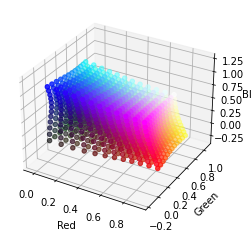

In [62]:
#@title Create a LUT using RBF

#@markdown Run this cell to solve an RBF LUT.

import numpy as np
from camera_match import RBF

rbf = RBF()

rbf.solve(source_data, target_data)

rbf.plot()

In [ ]:
#@title Save LUT

#@markdown The final LUT should appear in the files section. It should also download if you're on Chrome.
from google.colab import files

LUT_filename = 'LUT.cube' #@param {type:"string"}

rbf.export_LUT('LUT.cube')
files.download('LUT.cube') 

In [ ]:
#@title Create a Pipeline with a LinearMatrix

#@markdown Run this cell to solve a LinearMatrix.

pipeline = Pipeline([
    [CST(source_gamma="ALEXA Log C"), CST(source_gamma="S-Log3")],
    LinearMatrix()
])

# Find the optimum values to match the two cameras:
pipeline.solve(source_data, target_data)

# Plot the result:
pipeline.plot()

# Get the matrix:
matrix = pipeline.nodes[1]

# Print the matrix:
print(matrix.matrix)
